In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_excel(r"C:\Users\Lenovo\Desktop\python\studentperformance\student_performance_100.xlsx")
df.head()


,Student_ID,Name,Math,Science,English,Computer,History
0,S001,Student_1,59,56,49,100,98
1,S002,Student_2,61,89,49,76,59
2,S003,Student_3,73,71,78,62,89
3,S004,Student_4,41,41,50,98,84
4,S005,Student_5,71,89,67,69,79


In [5]:
df.info()
df.describe()


<class 'pandas.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Student_ID  100 non-null    str  
 1   Name        100 non-null    str  
 2   Math        100 non-null    int64
 3   Science     100 non-null    int64
 4   English     100 non-null    int64
 5   Computer    100 non-null    int64
 6   History     100 non-null    int64
dtypes: int64(5), str(2)
memory usage: 7.0 KB


,Math,Science,English,Computer,History
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,69.170000,69.350000,66.360000,67.230000,69.770000
std,17.622905,17.269331,18.160074,17.737625,18.110132
min,41.000000,40.000000,40.000000,40.000000,40.000000
25%,52.000000,55.500000,49.750000,51.750000,54.750000
50%,68.500000,68.000000,64.000000,63.500000,70.000000
75%,86.250000,85.000000,80.000000,81.250000,86.000000
max,99.000000,100.000000,100.000000,100.000000,99.000000


In [6]:
subjects = ["Math", "Science", "English", "Computer", "History"]

df["Average"] = df[subjects].mean(axis=1)
df.head()


,Student_ID,Name,Math,Science,English,Computer,History,Average
0,S001,Student_1,59,56,49,100,98,72.4
1,S002,Student_2,61,89,49,76,59,66.8
2,S003,Student_3,73,71,78,62,89,74.6
3,S004,Student_4,41,41,50,98,84,62.8
4,S005,Student_5,71,89,67,69,79,75.0


In [7]:
topper = df.loc[df["Average"].idxmax()]
topper


Student_ID          S071
Name          Student_71
Math                  92
Science               68
English               67
Computer              99
History               99
Average             85.0
Name: 70, dtype: object

In [9]:
failing = df[df[subjects].min(axis=1) < 40]
failing


,Student_ID,Name,Math,Science,English,Computer,History,Average


In [10]:
df["Rank"] = df["Average"].rank(ascending=False)
df.sort_values("Rank").head()


,Student_ID,Name,Math,Science,English,Computer,History,Average,Rank
70,S071,Student_71,92,68,67,99,99,85.0,1.0
11,S012,Student_12,90,86,89,60,92,83.4,2.0
44,S045,Student_45,90,83,80,82,81,83.2,3.0
29,S030,Student_30,85,100,49,94,83,82.2,4.0
91,S092,Student_92,92,93,98,51,71,81.0,5.0


In [11]:
def grade(avg):
    if avg >= 90:
        return "A"
    elif avg >= 75:
        return "B"
    elif avg >= 60:
        return "C"
    else:
        return "Fail"

df["Grade"] = df["Average"].apply(grade)
df.head()


,Student_ID,Name,Math,Science,English,Computer,History,Average,Rank,Grade
0,S001,Student_1,59,56,49,100,98,72.4,35.5,C
1,S002,Student_2,61,89,49,76,59,66.8,60.0,C
2,S003,Student_3,73,71,78,62,89,74.6,23.0,C
3,S004,Student_4,41,41,50,98,84,62.8,81.0,C
4,S005,Student_5,71,89,67,69,79,75.0,21.0,B


In [14]:
df.to_excel("student_report.xlsx", index=False)


In [15]:
df.sort_values("Average", ascending=False)


,Student_ID,Name,Math,Science,English,Computer,History,Average,Rank,Grade
70,S071,Student_71,92,68,67,99,99,85.0,1.0,B
11,S012,Student_12,90,86,89,60,92,83.4,2.0,B
44,S045,Student_45,90,83,80,82,81,83.2,3.0,B
29,S030,Student_30,85,100,49,94,83,82.2,4.0,B
91,S092,Student_92,92,93,98,51,71,81.0,5.0,B
...,...,...,...,...,...,...,...,...,...,...
18,S019,Student_19,61,60,48,45,48,52.4,96.5,Fail
25,S026,Student_26,58,43,72,44,45,52.4,96.5,Fail
69,S070,Student_70,46,45,43,55,54,48.6,98.0,Fail
61,S062,Student_62,44,42,46,44,49,45.0,99.0,Fail


In [16]:
df["Grade"].value_counts()


Grade
C       65
B       21
Fail    14
Name: count, dtype: int64

In [17]:
df[subjects].mean()


Math        69.17
Science     69.35
English     66.36
Computer    67.23
History     69.77
dtype: float64

In [19]:
import matplotlib.pyplot as plt


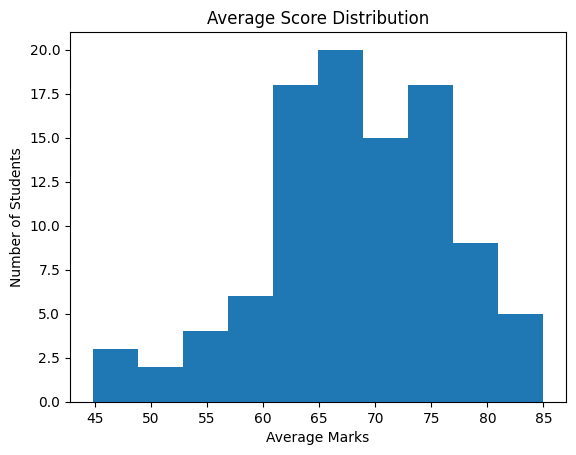

In [27]:
plt.figure()
plt.hist(df["Average"], bins=10)
plt.title("Average Score Distribution")
plt.xlabel("Average Marks")
plt.ylabel("Number of Students")
plt.show()


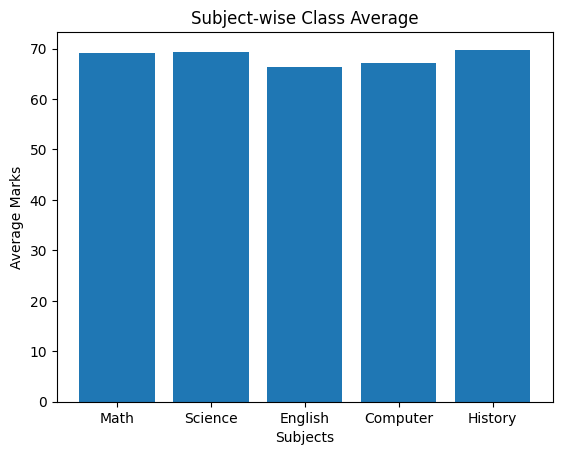

In [28]:
subject_avg = df[subjects].mean()

plt.figure()
plt.bar(subject_avg.index, subject_avg.values)
plt.title("Subject-wise Class Average")
plt.xlabel("Subjects")
plt.ylabel("Average Marks")
plt.show()


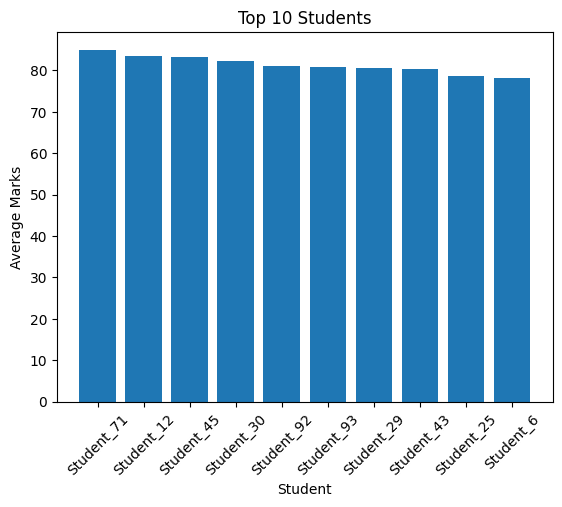

In [29]:
top10 = df.sort_values("Average", ascending=False).head(10)

plt.figure()
plt.bar(top10["Name"], top10["Average"])
plt.title("Top 10 Students")
plt.xlabel("Student")
plt.ylabel("Average Marks")
plt.xticks(rotation=45)
plt.show()


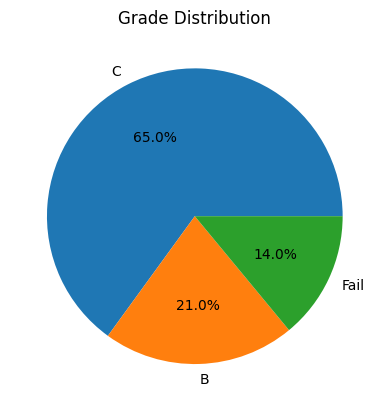

In [30]:
grade_counts = df["Grade"].value_counts()

plt.figure()
plt.pie(grade_counts, labels=grade_counts.index, autopct="%1.1f%%")
plt.title("Grade Distribution")
plt.show()


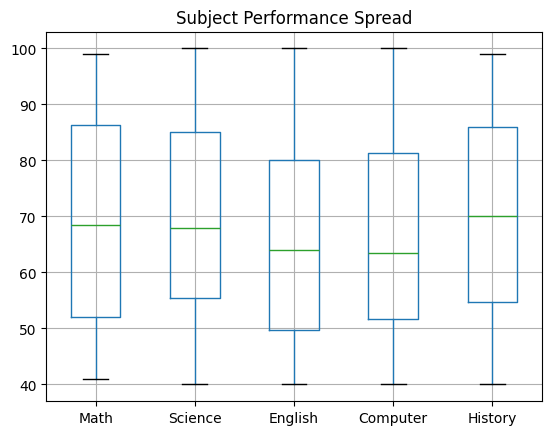

In [31]:
df[subjects].boxplot()
plt.title("Subject Performance Spread")
plt.show()


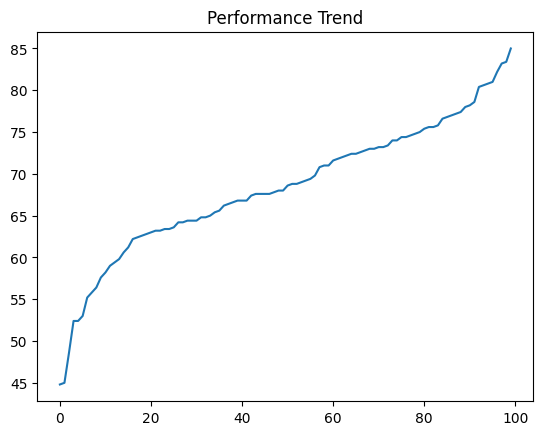

In [32]:
plt.plot(df.sort_values("Average")["Average"].values)
plt.title("Performance Trend")
plt.show()
